In [1]:
import pandas as pd # Trabajos con datasets
import numpy as np # Funciones matemáticas
import matplotlib.pyplot as plt #Gráficos sencillos
import math
import sklearn as sk

## Regresión logística

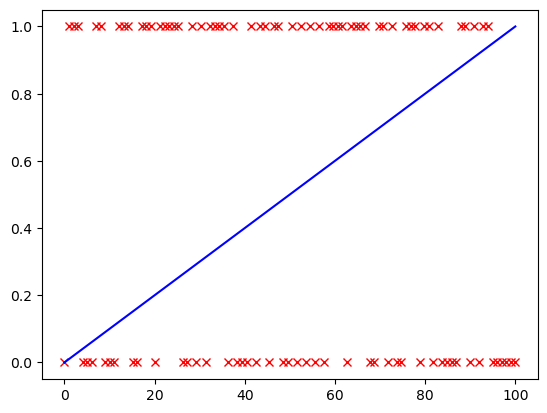

In [2]:
X=np.random.choice([0,1],100)
x=np.linspace(0,100,100)
y=x/100
plt.plot(x,X,'rx',x,y,'b')
plt.show()

$$\frac{P}{1-P}=\alpha X+\beta$$

Tenemos entonces para acentuar la idea
$$ln(\frac{P}{1-P})=\alpha X+\beta$$

Despejando $P$

$$\frac{P}{1-P}=e^{\alpha X+\beta}$$

$$P+e^{\alpha X+\beta}P=e^{\alpha X+\beta}$$

$$P=\frac{e^{\alpha X+\beta}}{e^{\alpha X+\beta}}$$

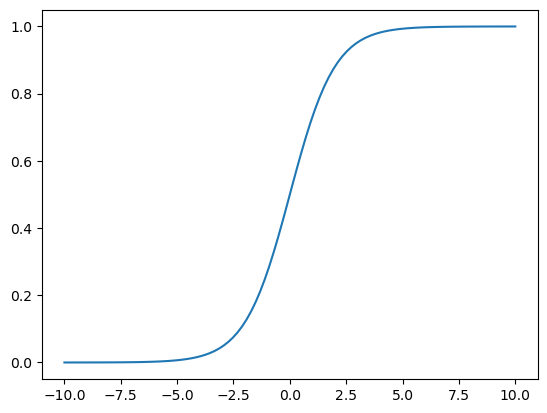

In [3]:
x=np.linspace(-10,10,100)
y=1/(1+np.exp(-x))
plt.plot(x,y)
plt.show()

$$\prod_{i=a}^{b} f(i)$$

En forma vectorial tenemos
$$\frac{\partial^2 l}{\partial \alpha_j^2}=\sum_{i=0}^{n}X_{ij}P_i(1-P_i)X_{ij}$$

En forma vectorial tenemos
$$\frac{\partial^2 l}{\partial \alpha_j^2}=X_iP_i(1-P_i)X_i^T$$

De donde
$$\frac{\partial^2 l}{\partial \alpha}=XWX^T$$

con $W=diag(P_i(1-P_i))$

Ahora lo que queremos es
$$\frac{\partial l}{\partial \alpha}=0$$

Para encontrar estas raices multidimensionales vamos a utilizar el método de Newton

Recordando el método de Newton

$$x_{n+1}=x_n+\frac{f(x_n)}{f'(x_n)}$$

In [4]:
from IPython.display import Image

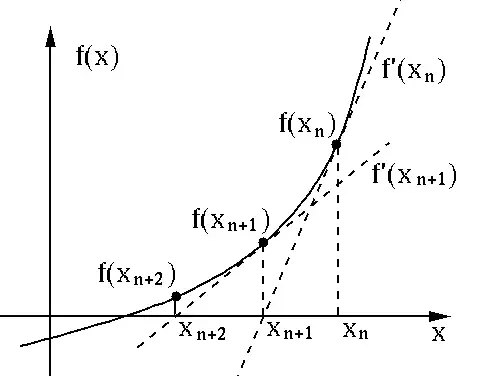

In [5]:
Image('NewtonRaphson.jpg')

Transformando la ecuación anterior en multidimensional tenemos

$$X_{n+1}=X_n+(f')^{-1}(X_n)f(X_n)$$

Aplicándolo a nuestro problema tenemos

$$\alpha^{n+1}=\alpha^n+(f')^{-1}(\alpha^n)f(\alpha^n)$$

donde el exponente representa el número de iteración y $f=\frac{\partial l}{\partial \alpha}$ y $f'=\frac{\partial^2 l}{\partial \alpha^2}$

Lo que reemplazando nos daría

$$\alpha^{n+1}=\alpha^n+(XW(\alpha^n)X^T)^{-1}(X^T(Y-P(\alpha^{n})))$$

* Definir L (funcion de maximo de Verosimilitud)
* Definir una funcion que calcule los $P_i$ en funcion del dataset y valores alphas
* Construir W la matriz de la segunda derivada en función de los $P_i$
* Definir una función logística que calcule los valores de alpha usando el método de Newton y las expresiones de $\frac{\partial l}{\partial_{\beta}}$ que hemos visto

Primeramente construyamos

$$L=\prod_{i=1}^{n} P_i^{Y_i}(1-P_i)^{1-Y_i}$$

In [6]:
def Verosimilitud(Y,Pi):
    prod=1
    prod_i=list(range(1,len(Pi)+1))
    for i in range(Y):
        prod_i[i]=np.where(Y[i]==1,Pi[i],1-Pi[i])
        prod=prod*prod_i[i]
    return prod

$$P_i=\frac{1}{1+e^{-\sum_{j=1}^n\alpha_j X_{ij}}}$$

In [7]:
def ProbLogit(X,alpha):
    n_fila=X.shape[0]
    n_col=X.shape[1]
    Pi=np.zeros((n_fila,1))
    expon=np.zeros((n_fila,1))
    for i in range(n_fila):
        expon[i]=0
        for j in range(n_col):
            ex=X[i][j]*alpha[j]
            expon[i]=expon[i]+ex
        Pi[i]=1/(1+np.exp(-expon[i]))
    return Pi

Construyamos $W=diag(P_i(1-P_i))$

In [8]:
def ConstructorW(Pi):
    
    n=len(Pi)
    W=np.zeros((n,n))
    for i in W
    return W

Implementemos el modelo de Newton

In [9]:
A=[2,3,5]

In [10]:
ConstructorW(A)

array([[ -2,   0,   0],
       [  0,  -6,   0],
       [  0,   0, -20]])

In [91]:
def Logistica(X,Y,tol):
    import numpy as np
    n_filas=np.shape(X)[0]
    bias=np.ones(n_filas).reshape(n_filas,1)
    X_new=np.append(X,bias,axis=1)
    n_cols=np.shape(X_new)[1]
    alpha=np.zeros((n_cols,1))
    root_dif=np.zeros((n_cols,1))
    itera=100000
    counter=1
    while (itera>tol):
        Pi=ProbLogit(X_new,alpha)
        Pi=Pi.reshape(n_filas)
        print(Pi)
        W=ConstructorW(Pi)
        print(W)
        num=np.transpose(np.matrix(X_new))*np.matrix(Y-Pi)
        print(np.transpose(np.matrix(X_new)), np.matrix(W))
        denom=np.transpose(np.matrix(X_new))*np.matrix(W)*np.matrix(X_new)
        root_dif=np.array(np.linalg.inv(denom)*num)
        alpha=alpha+root_dif
        itera=np.sum(root_dif*root_dif)
        li=Verosimilitud(Y,Pi)
        counter=counter+1
    print('alpha: '+str(alpha))
    return alpha

In [92]:
X=np.array(range(0,10))
X=X.reshape(10,1)
X

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [93]:
np.random.seed(2022)
Y=np.random.choice([0,1],10)
Y=Y.reshape(10,1)
Y

array([[1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0]])

In [94]:
bias=np.ones((10,1))
bias

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [95]:
X_new=np.concatenate([X,bias],axis=1)
X_new

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.],
       [4., 1.],
       [5., 1.],
       [6., 1.],
       [7., 1.],
       [8., 1.],
       [9., 1.]])

In [96]:
alpha=Logistica(X,Y,10**(-4))
alpha

[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
[[0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.25 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.25 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.25]]
[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]] [[0.25 0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.25 0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.25 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.25 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.25 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.25 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.25 0.   

TypeError: only integer scalar arrays can be converted to a scalar index

In [98]:
import statsmodels.api as stml

In [99]:
log_Model=stml.Logit(Y,X_new)

In [100]:
result=log_Model.fit()

Optimization terminated successfully.
         Current function value: 0.642534
         Iterations 5


In [101]:
result.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Logit
==============================================================
Model:              Logit            Pseudo R-squared: 0.073  
Dependent Variable: y                AIC:              16.8507
Date:               2022-10-04 14:12 BIC:              17.4559
No. Observations:   10               Log-Likelihood:   -6.4253
Df Model:           1                LL-Null:          -6.9315
Df Residuals:       8                LLR p-value:      0.31436
Converged:          1.0000           Scale:            1.0000 
No. Iterations:     5.0000                                    
----------------------------------------------------------------
         Coef.    Std.Err.      z      P>|z|     [0.025   0.975]
----------------------------------------------------------------
x1      -0.2322     0.2418   -0.9602   0.3370   -0.7061   0.2417
const    1.0448     1.2757    0.8190   0.4128   -1.4556   3.5452
==============================================================

"""

In [103]:
alfa

NameError: name 'alfa' is not defined